# **Problem Statement:**

You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack

**Tasks To Be Performed:**

1. Data Analysis:

a. Import the dataset

b. Get information about the dataset (mean, max, min, quartiles etc.)

c. Find the correlation between all fields


In [92]:
## import the required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
## import the dataset
df = pd.read_csv('/content/dataset (1).csv')

In [94]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**b. Get information about the dataset (mean, max, min, quartiles etc.)**


In [95]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**c. Find the correlation between all fields**

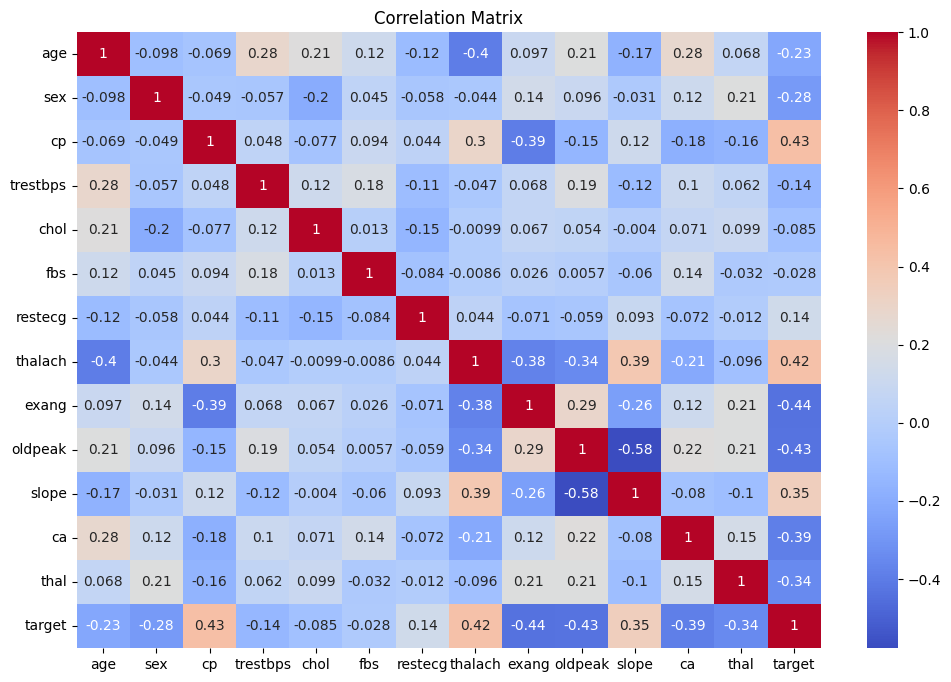

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

**2. Data Visualization:**

a. Visualize the number of patients having a heart disease and not having
a heart disease

b. Visualize the age and whether a patient has disease or not

c. Visualize correlation between all features using a heat map


**a. Visualize the number of patients having a heart disease and not having a heart disease**

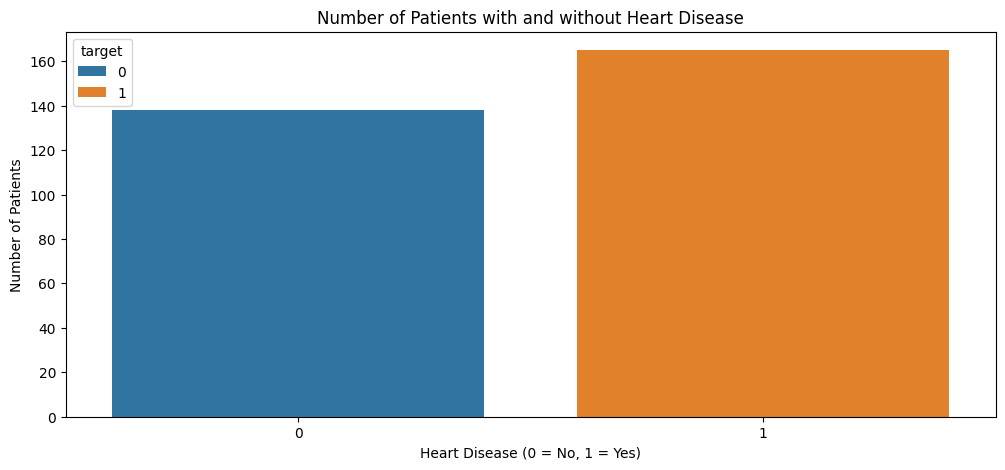

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(x='target' ,data = df, hue = 'target')
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()



**b. Visualize the age and whether a patient has disease or not**

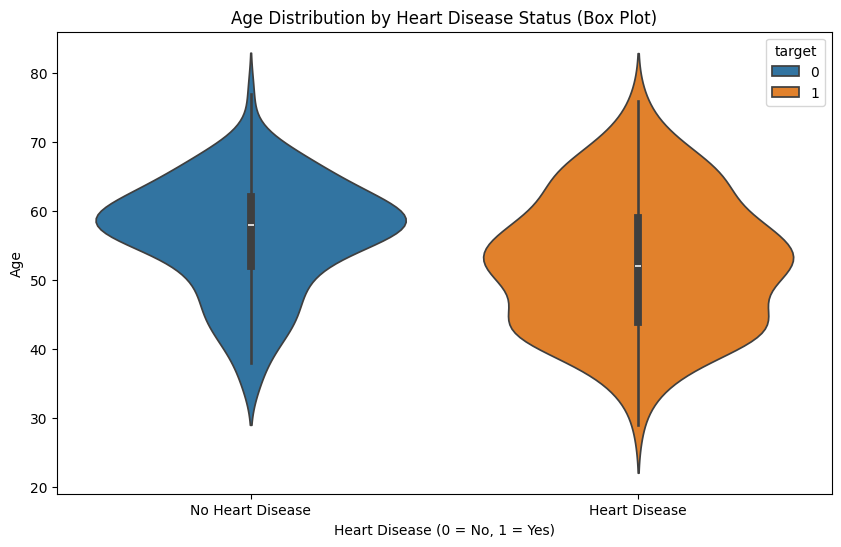

In [98]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='age', data=df, hue = 'target')
plt.title('Age Distribution by Heart Disease Status (Box Plot)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

**\Visualize correlation between all features using a heat map**

---



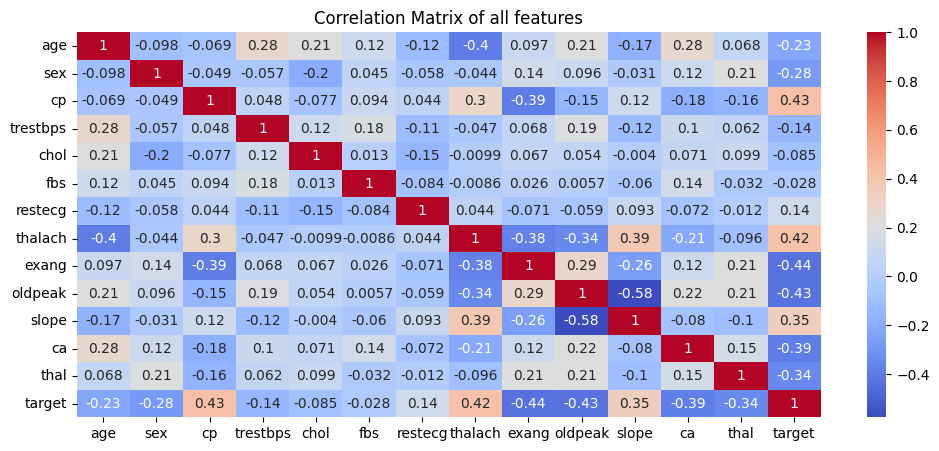

In [99]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix of all features")
plt.show()

# **3. Logistic Regression:**

a. Build a simple logistic regression model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [100]:
## check the null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [101]:
##check the duplicate values
df.duplicated().sum().sum()

np.int64(1)

In [102]:
## drop the duplicate
df.drop_duplicates(inplace=True)

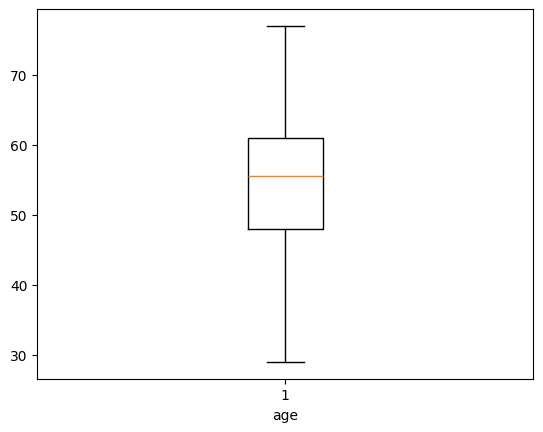

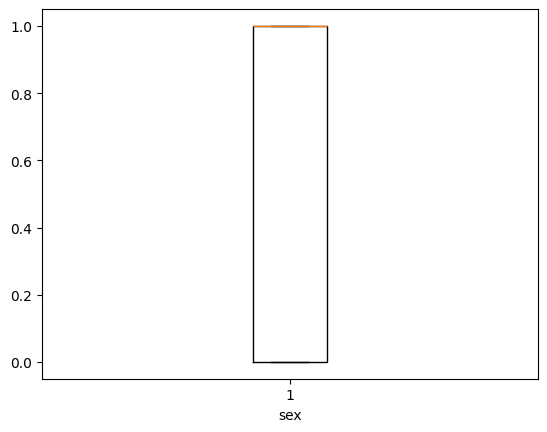

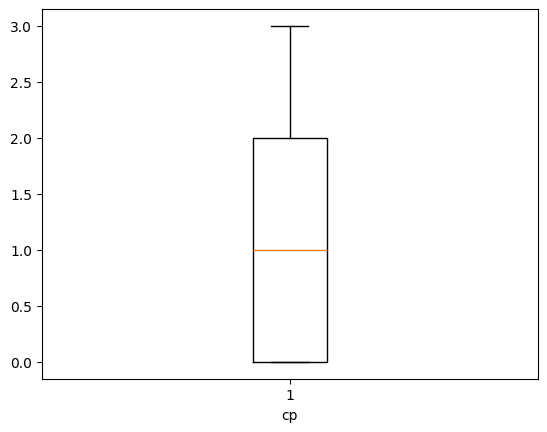

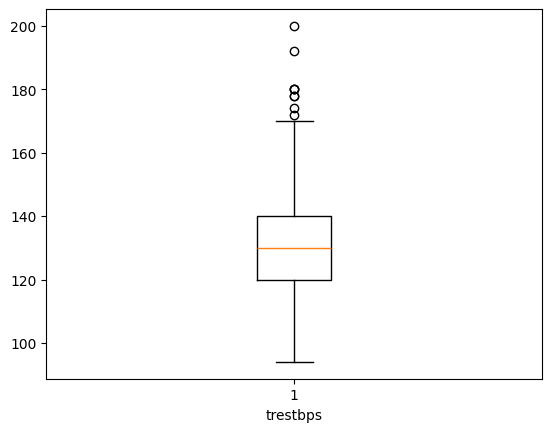

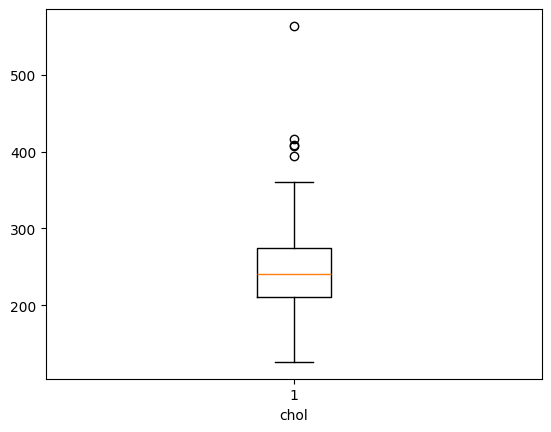

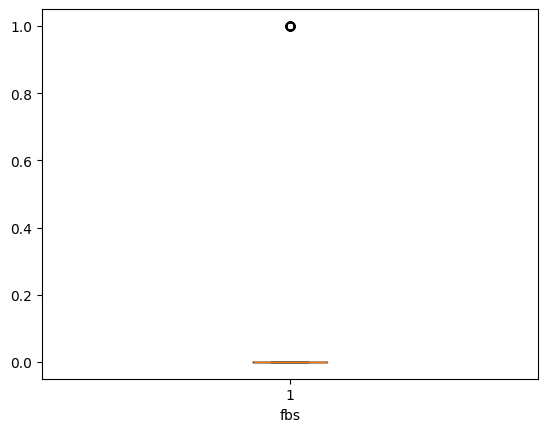

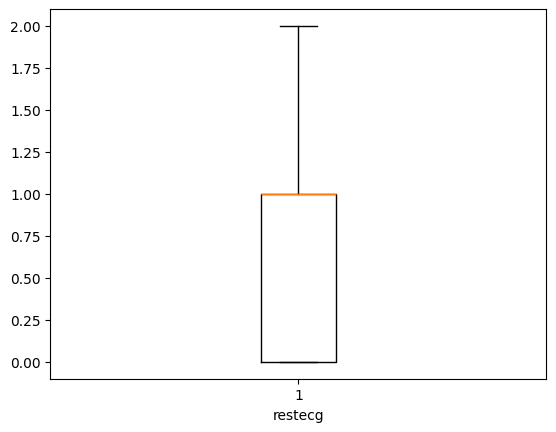

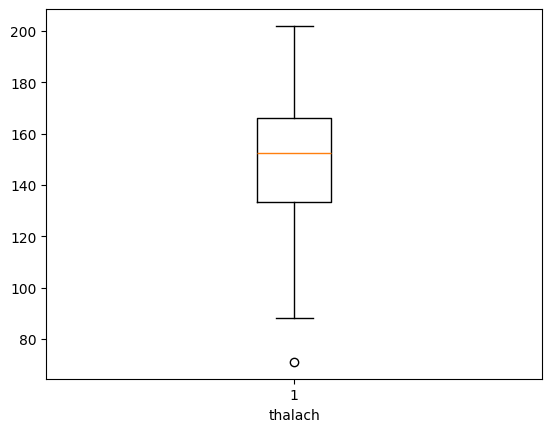

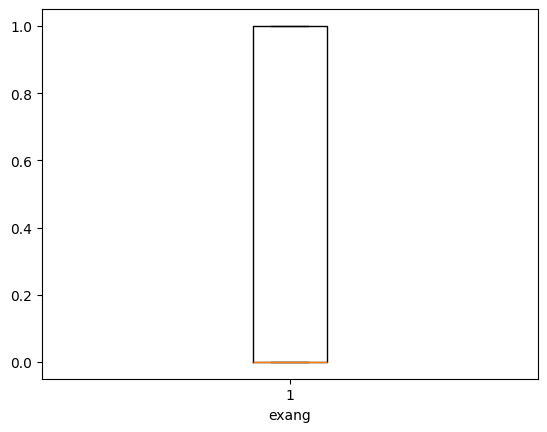

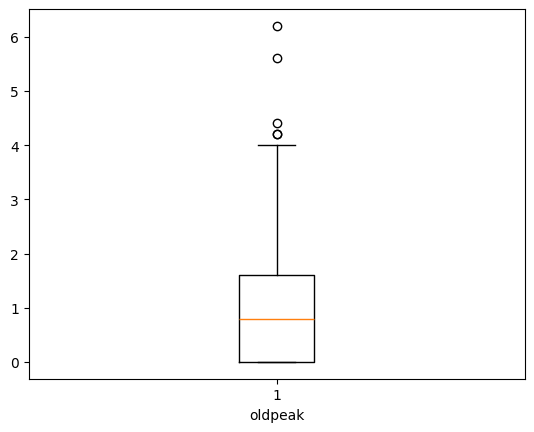

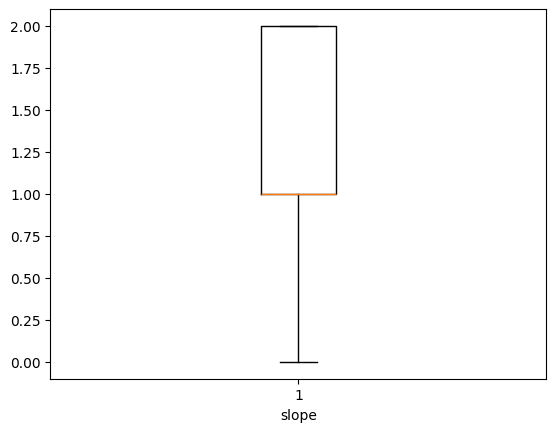

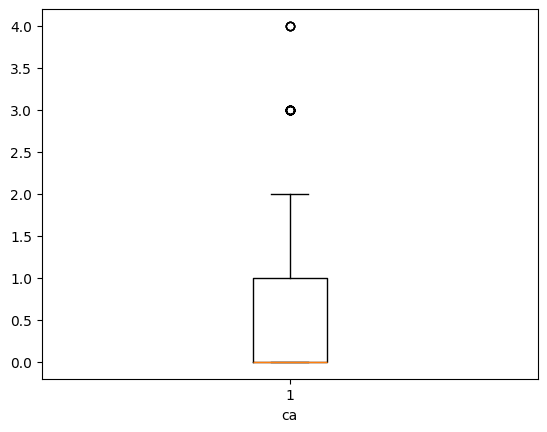

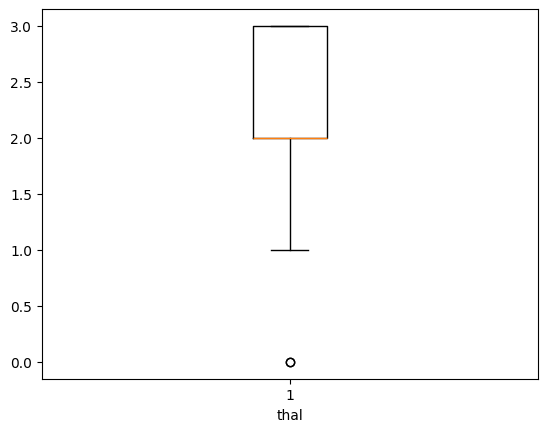

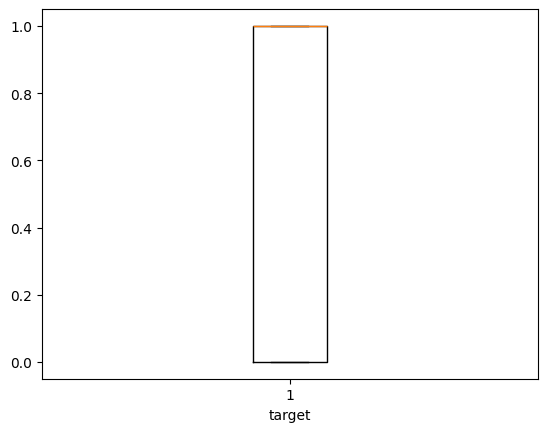

In [103]:
### check the outliers
for col in df.columns:
    if df[col].dtypes!='object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [104]:
## Create the variable for the data
X = df.drop('target', axis = 1)
y = df['target']

In [105]:
## split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [106]:
## import the logistic regression  model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [107]:
##make variable of it
model = LogisticRegression()

In [108]:
### Trai the model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
## Testing the model
y_pred = model.predict(X_test)

In [110]:
##confusion matrix
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_test,y_pred)

array([[26, 12],
       [ 5, 48]])

In [112]:
#the accuracy score
accuracy_score(y_test,y_pred)

0.8131868131868132

# **4. Decision Tree:**
a. Build a decision tree model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the decision tree using the Graphviz package

In [113]:
## import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
model1 = DecisionTreeClassifier()

In [115]:
## train the model
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
## test the model
y_pred1 = model1.predict(X_test)

In [117]:
#confusion matrix
confusion_matrix(y_test,y_pred1)

array([[28, 10],
       [14, 39]])

In [118]:
## check the accuracy
accuracy_score(y_test,y_pred1)

0.7362637362637363

**iv. Visualize the decision tree using the Graphviz package**

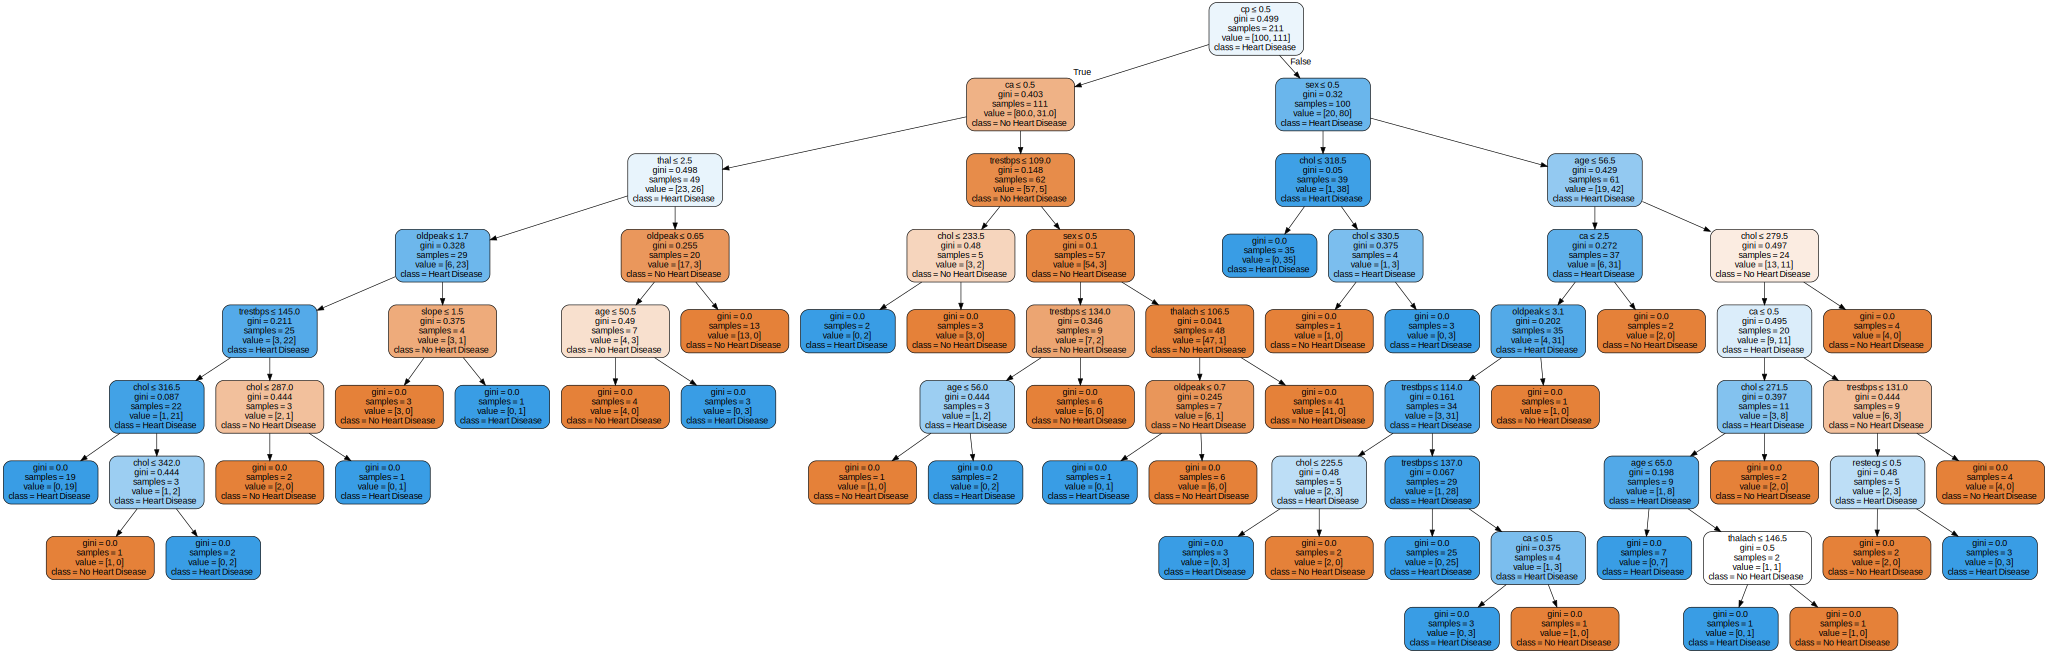

In [119]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(model1, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph

# **5. Random Forest:**
a. Build a Random Forest model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the model using the Grap

In [120]:
## import the random forest model
from sklearn.ensemble import RandomForestClassifier

In [121]:
model2 = RandomForestClassifier()

In [122]:
##trin the data
model2.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
## Test the data
y_pred2 = model2.predict(X_test)

In [124]:
## confusion matrx
confusion_matrix(y_test,y_pred2)

array([[27, 11],
       [ 6, 47]])

In [125]:
## Accuracy
accuracy_score(y_test,y_pred2)

0.8131868131868132

# **Visualize the model using the Grap**

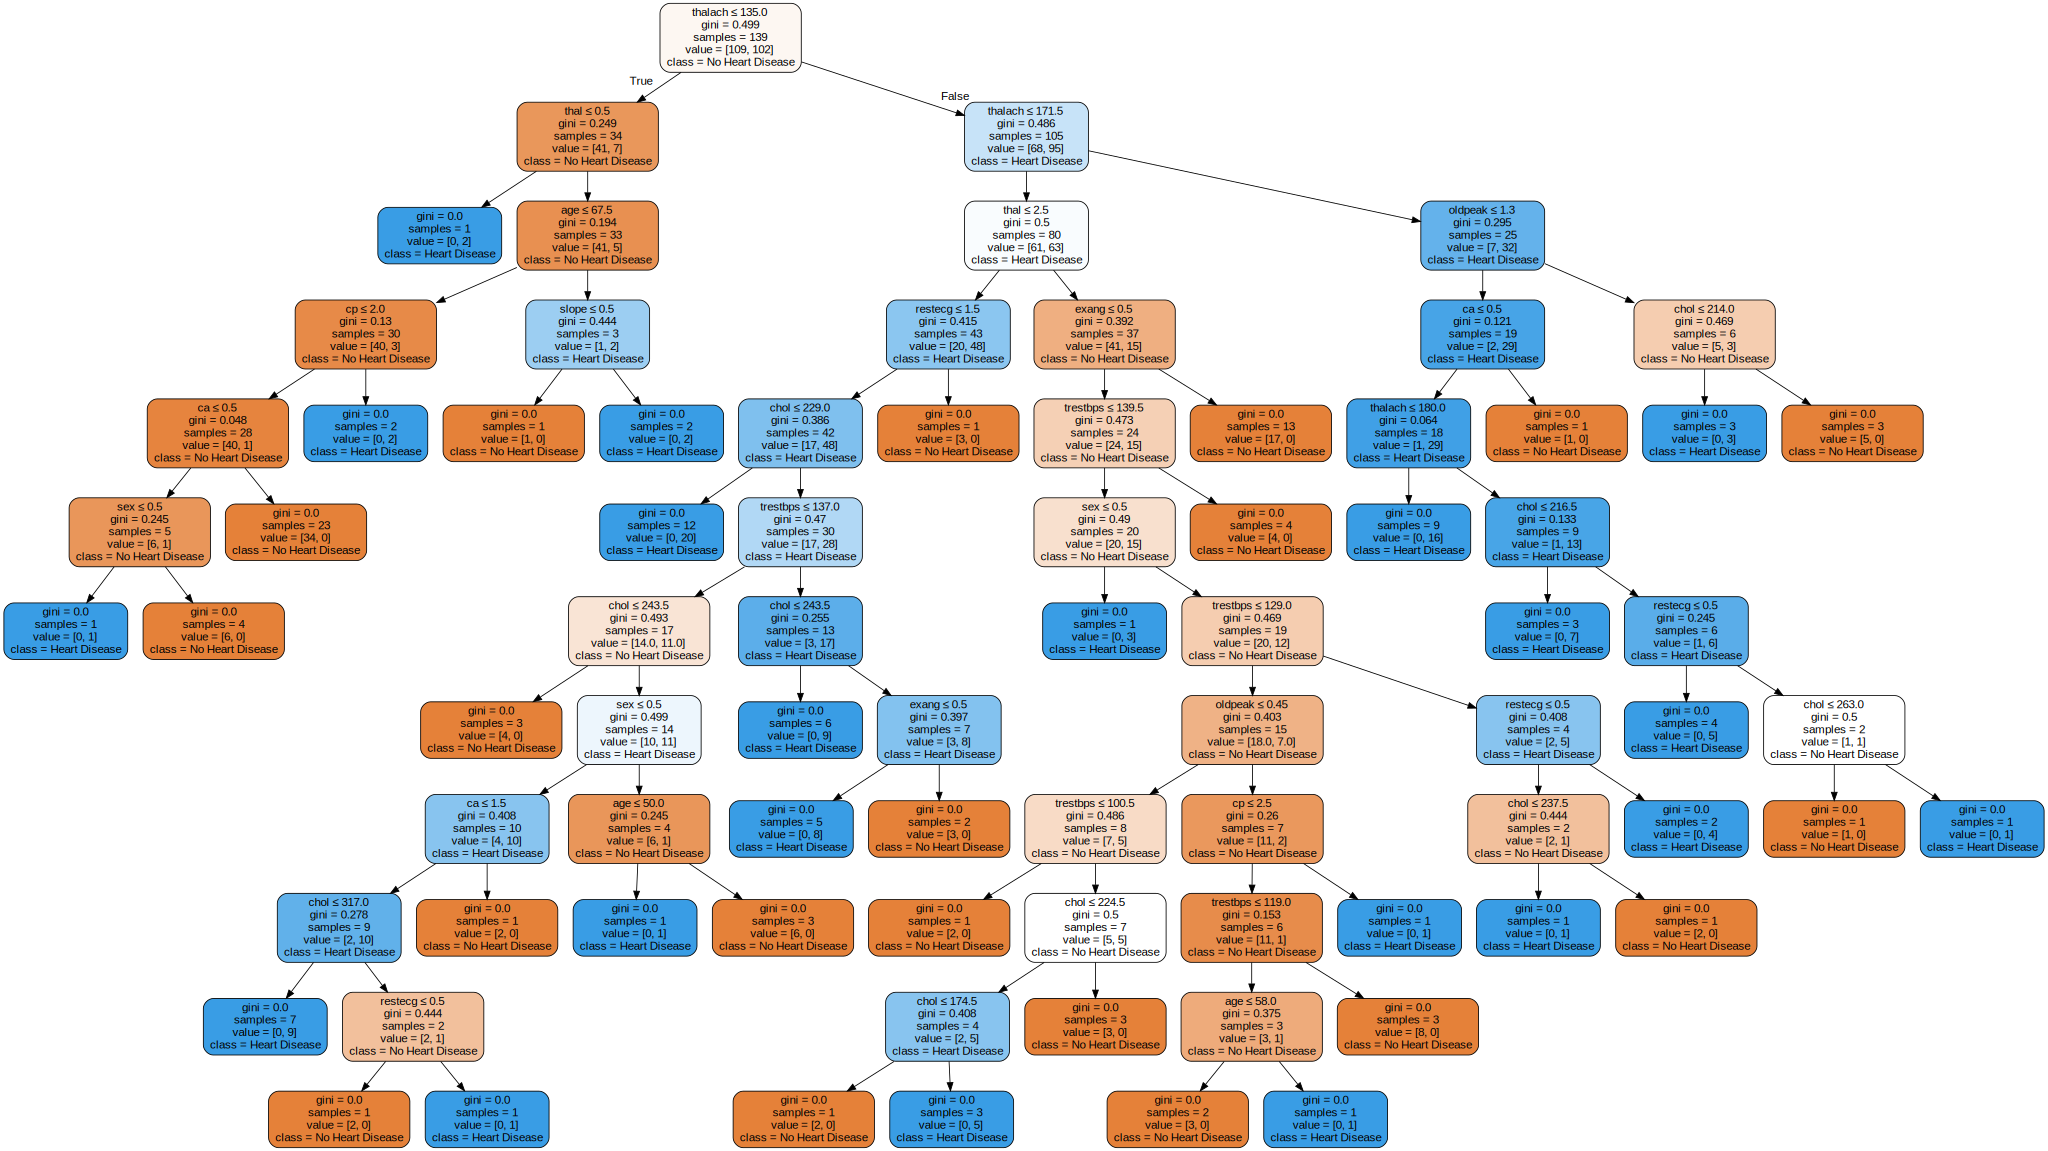

In [126]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize one of the decision trees from the Random Forest model
# We'll pick the first estimator (tree) in the forest for visualization
one_tree = model2.estimators_[0]

dot_data_rf = export_graphviz(one_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

graph_rf = graphviz.Source(dot_data_rf)
graph_rf

**6. Select the best model**

a. Print the confusion matrix of all classifiers

b. Print the classification report of all classifiers

c. Calculate Recall Precision and F1 score of all the models

d. Visualize confusion matrix using heatmaps

e. Select the best model based on the best accuracies

# **6. Select the best model**


# **The best model is**  **RandomForestClassifier**



**a. Print the confusion matrix of all classifiers**

Print Confusion Matrix for Logistic Regression:

In [127]:
confusion_matrix(y_test, y_pred)

array([[26, 12],
       [ 5, 48]])

Print Confusion Matrix for Decision Tree:

In [128]:
confusion_matrix(y_test, y_pred1)

array([[28, 10],
       [14, 39]])

Print Confusion Matrix for Random Forest:

In [129]:
confusion_matrix(y_test, y_pred2)

array([[27, 11],
       [ 6, 47]])

# **b. Print the classification report of all classifiers**

In [130]:
from sklearn.metrics import classification_report

In [131]:
## classification Report of Logistics Regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.80      0.91      0.85        53

    accuracy                           0.81        91
   macro avg       0.82      0.79      0.80        91
weighted avg       0.82      0.81      0.81        91



In [132]:
## Classification Report Of Decision Tree
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



In [133]:
## classification Report of Random Forest Model
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        38
           1       0.81      0.89      0.85        53

    accuracy                           0.81        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.81      0.81        91



# **c.Calculate Recall Precision and F1 score of all the models**, This question is already solved in the as **classfication report**

 **Select the best model based on the best accuracies** solved at the above
